In [1]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
from scipy.sparse import csc_matrix, diags
from scipy.sparse.linalg import svds

We will demonstrate the result of Th.1. on Marchenko-Pastur distribution

In [2]:
n=10000       #Number of observations
y1=0.6
p=int(n*y1)   #Number of assets

In [3]:
Z = np.random.randn(n,p)

In [4]:
W = (Z.transpose() @ Z) / n   #A sample correlation matrix for independent assets

In [5]:
eigenvalues=np.linalg.eigvals(W)

(array([197., 234., 224., 210., 198., 181., 171., 162., 155., 147., 141.,
        135., 129., 125., 119., 115., 113., 108., 105., 100.,  99.,  95.,
         92.,  92.,  87.,  86.,  84.,  80.,  80.,  77.,  76.,  75.,  71.,
         70.,  66.,  66.,  66.,  64.,  61.,  60.,  59.,  59.,  56.,  54.,
         54.,  52.,  51.,  48.,  50.,  47.,  45.,  46.,  44.,  43.,  42.,
         39.,  39.,  37.,  37.,  35.,  35.,  32.,  34.,  30.,  30.,  29.,
         28.,  26.,  25.,  24.,  21.,  22.,  20.,  18.,  17.,  14.,  14.,
         13.,   8.,   7.]),
 array([0.05131004, 0.08985807, 0.12840611, 0.16695414, 0.20550218,
        0.24405021, 0.28259825, 0.32114628, 0.35969432, 0.39824235,
        0.43679039, 0.47533842, 0.51388646, 0.55243449, 0.59098253,
        0.62953056, 0.6680786 , 0.70662663, 0.74517467, 0.7837227 ,
        0.82227074, 0.86081877, 0.89936681, 0.93791484, 0.97646288,
        1.01501091, 1.05355895, 1.09210698, 1.13065502, 1.16920305,
        1.20775109, 1.24629912, 1.28484716, 1.

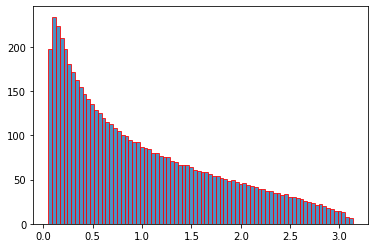

In [6]:
plt.hist(eigenvalues, 80, alpha=.8, edgecolor='red')

Now we plot eigenvalues for the case of one group of constantly correlated assets and demonstrate that these distributions coincide after multiplication by (1-correlation)

In [7]:
rho1 = 0.9
E= np.ones((p, p))
b= (-np.sqrt(1 - rho1) - np.sqrt(1 + rho1 * (p-1))) / p
C= np.sqrt(1 - rho1) * np.identity(p) + E * b            #Matrix C is a block-type sqrt(Sigma_rho)
print(C @ C)

[[1.  0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 1.  0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 1.  ... 0.9 0.9 0.9]
 ...
 [0.9 0.9 0.9 ... 1.  0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 1.  0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 1. ]]


In [8]:
Wrho=C.transpose() @ W @ C        #Correlation matrix

In [9]:
eigenvalues_rho = np.linalg.eigvals(Wrho)

(array([197., 234., 224., 210., 197., 182., 171., 162., 155., 146., 141.,
        135., 129., 125., 120., 115., 113., 107., 106.,  99.,  99.,  96.,
         91.,  93.,  87.,  85.,  84.,  81.,  78.,  78.,  77.,  74.,  72.,
         69.,  66.,  66.,  67.,  63.,  61.,  60.,  60.,  58.,  55.,  56.,
         52.,  53.,  51.,  49.,  49.,  47.,  46.,  46.,  43.,  43.,  41.,
         40.,  39.,  38.,  36.,  35.,  36.,  31.,  34.,  30.,  30.,  29.,
         27.,  27.,  25.,  24.,  22.,  21.,  20.,  18.,  17.,  14.,  14.,
         13.,   8.,   7.]),
 array([0.00513101, 0.00898524, 0.01283946, 0.01669368, 0.0205479 ,
        0.02440212, 0.02825634, 0.03211057, 0.03596479, 0.03981901,
        0.04367323, 0.04752745, 0.05138168, 0.0552359 , 0.05909012,
        0.06294434, 0.06679856, 0.07065278, 0.07450701, 0.07836123,
        0.08221545, 0.08606967, 0.08992389, 0.09377812, 0.09763234,
        0.10148656, 0.10534078, 0.109195  , 0.11304922, 0.11690345,
        0.12075767, 0.12461189, 0.12846611, 0.

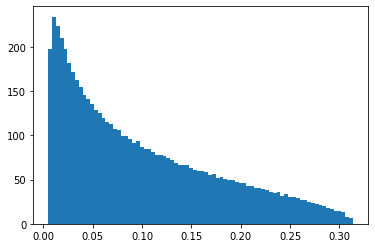

In [10]:
plt.hist(eigenvalues_rho[1:], 80)

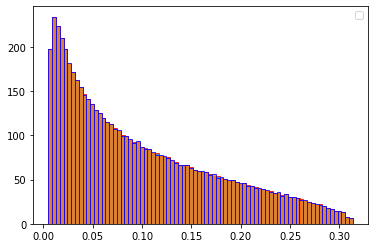

In [11]:
plt.hist( (1-rho1) * eigenvalues, 80, alpha=.8, edgecolor='red')
plt.hist(eigenvalues_rho[1:], 80, alpha=.8, edgecolor='blue')
plt.legend()
 
# Showing the plot using plt.show()
plt.show()

We see that the highest eigenvalue has asymptotic $y*rho*n$

---



In [12]:
u2, s2, vT2 = svds(Z @ C / np.sqrt(n), k=1)
print('Check first eigenvalues asumptotic:',  eigenvalues_rho[0] / n, s2[0]**2 / n)

Check first eigenvalues asumptotic: 0.5351513949141717 0.535151394914172


Now we suppose that there are 2 blocks: 30% corresponds to $\rho=0.7$ and 70% corresponds to $\rho=0$
(We will demonstrate results of Th.2 now)

In [13]:
block_coeff = 0.7
n1 = int(block_coeff * p) # Number of assets in the first block
y1 = n1 / n
E_block = np.ones((n1, n1))
b_block = (-np.sqrt(1 - rho1) - np.sqrt(1 + rho1 * (n1-1))) / n1
C_block = np.sqrt(1 - rho1) * np.identity(n1) + E_block * b_block
print(C_block @ C_block)



[[1.  0.9 0.9 ... 0.9 0.9 0.9]
 [0.9 1.  0.9 ... 0.9 0.9 0.9]
 [0.9 0.9 1.  ... 0.9 0.9 0.9]
 ...
 [0.9 0.9 0.9 ... 1.  0.9 0.9]
 [0.9 0.9 0.9 ... 0.9 1.  0.9]
 [0.9 0.9 0.9 ... 0.9 0.9 1. ]]


In [14]:
rho2 = 0.7
n2 = p - n1    #number of assets in the second block
E2_block = np.ones((n2, n2))
b2_block = (-np.sqrt(1 - rho2) - np.sqrt(1 + rho2*(n2 - 1))) / n2
C2_block = np.sqrt(1 - rho2) * np.identity(n2) + E2_block * b2_block

B=np.identity(p)              
for i in range(n1):
  for j in range(n1):
    B[i][j]=C_block[i][j]
for i in range(n2):
  for j in range(n2):
    B[i+n1][j+n1]=C2_block[i][j]
print(B @ B) # Check that B = SquareRoot(Sigma)


[[1.  0.9 0.9 ... 0.  0.  0. ]
 [0.9 1.  0.9 ... 0.  0.  0. ]
 [0.9 0.9 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.7 0.7]
 [0.  0.  0.  ... 0.7 1.  0.7]
 [0.  0.  0.  ... 0.7 0.7 1. ]]


In [15]:
E1 = np.zeros((n,1))
E2= np.zeros((n,1))
for i in range(n1):
  E1[i]=1
for i in range(n2):
  E2[n1+i]=1
BM =  E1 @ E1.transpose()   
print(BM)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Construct matrix $X_2$ that contains squared variables

In [16]:
X = Z @ B
X2 = X * X - 1


In [17]:
ub, lambda1, vb = svds(X / np.sqrt(n), k=2)

In [18]:
ub2, lambda2, vb2 = svds(X2 / np.sqrt(n), k=2)

In [19]:
rho_estim0 = lambda2[0]**2 / lambda1[0]**2 / 2
rho_estim1 = lambda2[1]**2 / lambda1[1]**2 / 2
print('Estimated values of rho', rho_estim0, rho_estim1)
print('true values of rho', rho1, rho2)

Estimated values of rho 0.7268972272367288 0.8697493330106861
true values of rho 0.9 0.7


In [20]:
print('Estimated value of the block size', lambda1[0]**2 / rho_estim0, lambda1[1]**2 / rho_estim1)

Estimated value of the block size 1760.991220570641 4202.051371208241


In [21]:
print('original block sizes', n1, n2)

original block sizes 4200 1800


Case of nonttrivial Interblock interaction

In [22]:
gamma=0.35


In [23]:
B2 = B @ B
for i in range(n1):
  for j in range(n2):
    B2[i][j+n1]=gamma
    B2[j+n1][i]=gamma

B=np.linalg.cholesky(B2)
print(B @ B.transpose())

[[1.   0.9  0.9  ... 0.35 0.35 0.35]
 [0.9  1.   0.9  ... 0.35 0.35 0.35]
 [0.9  0.9  1.   ... 0.35 0.35 0.35]
 ...
 [0.35 0.35 0.35 ... 1.   0.7  0.7 ]
 [0.35 0.35 0.35 ... 0.7  1.   0.7 ]
 [0.35 0.35 0.35 ... 0.7  0.7  1.  ]]


In [24]:
Z = np.random.randn(n,p)
X = Z @ B.transpose()
X2 = X * X - 1
X3 = X * X * X - 3 * X 
u, s, v = svds(X / np.sqrt(n), k=2)
u2, s2, v2 = svds(X2 / np.sqrt(n), k=2)
u3, s3, v3 = svds(X3 / np.sqrt(n), k=2)

Plot graph (method W3):

In [ ]:
list_rhos11 = []
list_rhos22 = []
list_rhos12 = []
list_y1 = []
list_y2 = []
plot_size = 100
for i in range (plot_size):
  Z = np.random.randn(n,p)
  X = Z @ B.transpose()
  X3 = X * X * X - 3 * X 
  u3, s3, v3 = svds(X3 / np.sqrt(n), k=2)
  rho1y1=(X @ v3[1]).transpose() @ (X @ v3[1])/n/n
  rho2y2=(X @ v3[0]).transpose() @ (X @ v3[0])/n/n
  rho12sqrty1sqrty2=(X @ v3[1]).transpose() @ (X @ v3[0])/n/n
  rho1_estimated=(s3[1]**2 / n / rho1y1 / 6)**0.5
  rho2_estimated=(s3[0]**2 / n / rho2y2 / 6)**0.5
  y1_estimated= rho1y1 / rho1_estimated
  y2_estimated= rho2y2 / rho2_estimated
  rho12_estimated = rho12sqrty1sqrty2 / np.sqrt(y1_estimated * y2_estimated)
  list_rhos11.append(rho1_estimated)
  list_rhos22.append(rho2_estimated)
  list_rhos12.append(rho12_estimated)
  list_y1.append(y1_estimated)
  list_y2.append(y2_estimated)
  print(rho1_estimated,rho2_estimated, rho12_estimated, y1_estimated, y2_estimated)


In [ ]:
yy=np.ones(plot_size)
print('mean (measured vs theor)',np.mean(list_rhos11), rho1)
print('std',np.std(list_rhos11))
print('mean (measured vs theor)',np.mean(list_rhos22), rho2)
print('std',np.std(list_rhos22))
print('mean (measured vs theor)',np.mean(np.abs(list_rhos12)), gamma)
print('std',np.std(np.abs(list_rhos12)))
print('mean (measured vs theor)',np.mean(list_y1), y1)
print('std',np.std(list_y1))
#plt.scatter(list1,yy)
print('mean (measured vs theor)',np.mean(list_y2), n2/n)
print('std',np.std(list_y2))

Plot graph (method W4):

In [ ]:
list4_rhos11 = []
list4_rhos22 = []
list4_rhos12 = []
list4_y1 = []
list4_y2 = []
plot_size4 = 100
for i in range (plot_size4):
  Z = np.random.randn(n,p)
  X = Z @ B.transpose()
  alpha4=-6
  X4 = X * X * X * X + alpha4 * X * X - (3+alpha4) 
  u4, s4, v4 = svds(X4 / np.sqrt(n), k=2)

  qrho1y1=(X @ v4[1]).transpose() @ (X @ v4[1])/n/n
  qrho2y2=(X @ v4[0]).transpose() @ (X @ v4[0])/n/n
  
  qrho12sqrty1sqrty2=(X @ v4[1]).transpose() @ (X @ v4[0])/n/n
  qrho1_estimated = (s4[1]**2/ n /qrho1y1 / 24)**(1./3)
  qrho2_estimated = (s4[0]**2/ n /qrho2y2 / 24)**(1./3)
  
  qy1_estimated= qrho1y1 / qrho1_estimated
  qy2_estimated= qrho2y2 / qrho2_estimated
  qrho12_estimated = qrho12sqrty1sqrty2 / np.sqrt(qy1_estimated * qy2_estimated)
  
  list4_rhos11.append(qrho1_estimated)
  list4_rhos22.append(qrho2_estimated)
  list4_rhos12.append(qrho12_estimated)
  list4_y1.append(qy1_estimated)
  list4_y1.append(qy2_estimated)
  print(qrho1_estimated,qrho2_estimated, qrho12_estimated, qy1_estimated, qy2_estimated)

In [ ]:
print('mean (measured vs theor)',np.mean(list4_rhos11), rho1)
print('std',np.std(list4_rhos11))
print('mean (measured vs theor)',np.mean(list4_rhos22), rho2)
print('std',np.std(list4_rhos22))
print('mean (measured vs theor)',np.mean(np.abs(list4_rhos12)), gamma)
print('std',np.std(np.abs(list4_rhos12)))
print('mean (measured vs theor)',np.mean(list4_y1), y1)
print('std',np.std(list4_y1))
print('mean (measured vs theor)',np.mean(list4_y2), n2/n)
print('std',np.std(list4_y2))